![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fhackathon&branch=master&subPath=ColonizingMars/ChallengeTemplates/challenge-option-2-how-could-we-colonize-mars.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# Data Scientist Challenge: Humanity must build a new home on Mars.


You’re a data scientist on a team of newly-arrived humans. While you were on Earth, you figured out how you could make the planet habitable. From growing food to clothing needs, you need to start building the framework for sustaining life on the red planet. 

In this notebook, we have decided to focus on **Music**.  We need some entertainment when we are bored on Mars ! 

![music image](https://github.com/callysto/hackathon/blob/sustainable-society/SustainabilityOnMars/ChallengeExamples/music-example-image.jpg?raw=true)

### Section I: Problem background

We believe that arts shape the structures, behaviour and values of society. Music in particular, is one of the most powerful media to communicate messages to billions of people. 

The questions we picked: Will it be boring on Mars ? Can music be used for entertainment on Mars ?  Do we have enough music to listen to when we are bored ? 

### Section II: The data you used

This Spotify Dataset has 160k+ songs - released in between 2000 and 2020. Each row represents a single track and each column represents a field of the track.

Spotify is a Swedish audio streaming platform that provides DRM-protected music and podcasts from record labels and media companies. At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year.

Below are some of the fields available for each track which we will use to answer the questions we are interested in:

**Beats Per Minute (BPM)** — The tempo of the song.\
**Energy** — The energy of a song, the higher the value, the more energetic.\
**Danceability** — The higher the value, the easier it is to dance to this song.\
**Loudness** — The higher the value, the louder the song (in dB).\
**Valence** — The higher the value, the more positive mood for the song.\
**Length** — The duration of the song.\
**Acousticness** — The higher the value the more acoustic the song is.\
**Release Year** — The year each song was released.\
**Popularity** — The higher the value the more popular the song is.\

#### Would you like to get in the mood and listen to 'The Martian' soundtrack playing while you work on analysing data for Sustainability on Mars ? 

Run the following cell if your answer is 'Yes'

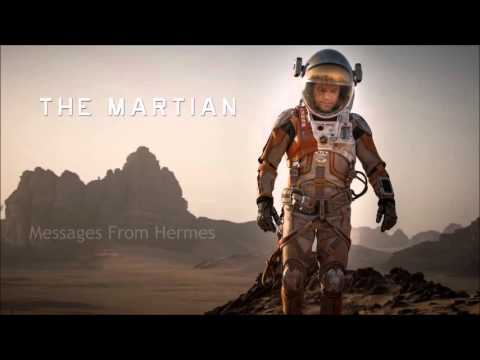

In [1]:
from youtube_search import YoutubeSearch
song_name = 'Best of The Martian Soundtrack (Part 1)'
video_id = YoutubeSearch(song_name, max_results=1).to_dict()[0]['id']
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

#### 👨🏽‍💻 Now let's do some data science 

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf

In [3]:
# reading the data 
# we have csv file stored in the cloud
url = "https://raw.githubusercontent.com/callysto/hackathon/sustainable-society/SustainabilityOnMars/ChallengeExamples/spotify-data-2000-2020.csv"

# read csv file from url and save it as dataframe
music = pd.read_csv(url, index_col=0)

# print first 5 rows
music.head()

,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
acousticness,,,,,,,,,,,,,,,,,,
0.97200,['David Bauer'],0.567,313293,0.227,0,0w0D8H1ubRerCXHWYJkinO,0.601000,10,0.110,-13.441,1,Shout to the Lord,47,2000,0.0290,136.123,0.0396,2000
0.32100,['Etta James'],0.821,360240,0.418,0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9,0.222,-9.841,0,Miss You,51,2000-12-12,0.0407,117.382,0.8030,2000
0.00659,['Quasimoto'],0.706,202507,0.602,1,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11,0.400,-8.306,0,Real Eyes,44,2000-06-13,0.3420,89.692,0.4790,2000
0.00390,['Millencolin'],0.368,173360,0.977,0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11,0.350,-2.757,0,Penguins & Polarbears,52,2000-02-22,0.1270,165.889,0.5480,2000
0.12200,['Steve Chou'],0.501,344200,0.511,0,4mronxcllhfyhBRqyZi8kU,0.000000,7,0.279,-9.836,0,黃昏,53,2000-12-25,0.0291,78.045,0.1130,2000


In [4]:
# how many rows and colums does the data have?
music.shape

(41656, 18)

### Section III: Data Analysis and Visualization

We want to investigate how much time of songs are available on Spotify ? what is the average duration of a song ? what is the longest and shortest song ? 

We can answer these questions by checking the column names of the table that hint to which kind of data is available for each track. 

In [5]:
# print column names
music.columns

Index(['artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

We notice we have a column with the duration of each song 'duration_ms'. Let's sort the tracks descendingly according to their duration. 

In [6]:
# arrange all songs we have by duration
music.sort_values(by='duration_ms',ascending=False)

,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
acousticness,,,,,,,,,,,,,,,,,,
0.111000,['Sound Dreamer'],0.0000,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392000,2,0.1370,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0000,0.000,0.000000,2013
0.975000,['Sounds for Life'],0.1530,4270034,0.079200,0,605JTCltCe1IcqrGXQ294K,1.000000,10,0.1130,-23.962,0,Brown Noise for Sleep,42,2009-03-15,0.1250,132.904,0.000537,2009
0.000385,"['Lightning, Thunder and Rain Storm']",0.1160,4269407,0.338000,0,7dYf0CsWHDLvlP6HJPs3zO,0.093500,1,0.3420,-36.638,1,Midnight Thunderstorm Part 2,44,2009-09-22,0.0648,94.453,0.029300,2009
0.932000,['Ocean Waves For Sleep'],0.0797,4120258,0.995000,0,1saXdvEAafdRzUphXBzSHg,0.562000,1,0.3100,-17.379,1,Ocean Waves for Sleep,55,2010-07-16,0.0612,84.788,0.000010,2010
0.932000,['Ocean Sounds'],0.0797,4120258,0.995000,0,2QfFLpSGF1T1pY6tq4kD7Z,0.562000,1,0.3100,-17.379,1,Ocean Waves Sounds,44,2010-07-16,0.0612,84.788,0.000010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.253000,['Kanye West'],0.7310,31360,0.412000,1,466XcSgGAiQxcDrcV0yoMP,0.000000,11,0.1640,-11.590,0,Skit #2,44,2005-09-30,0.9460,66.512,0.950000,2005
0.000000,['Bass Mekanik'],0.1330,31000,0.000000,0,6v2oyTikD4c9X5C3IMdKy2,0.000000,10,0.0000,-39.753,1,65 Hz Test Tone,42,2000-03-01,0.0000,140.044,0.000000,2000
0.098800,['Thomas & Friends'],0.9060,30946,0.596000,0,2mQVahe9gsumDmr67neUzb,0.000059,8,0.0561,-10.254,1,Thomas Theme (Reprise),52,2001-01-01,0.0463,98.980,0.811000,2001


What is the longest track ? what is the shorted track ? what is the average duration of a track or song ? 

In [7]:
# notice that the duration is provided in milli seconds so it will be more intuitive to convert it to minutes
# longest song
print("Maximum duration song - " , music['duration_ms'].max()/(1000*60), "minutes")

# shortest song
print("Minimum duration song - " , music['duration_ms'].min()/(1000*60) , "minutes")

# can we estimate what is the average duration in minutes of a song 
print("Average song duration : ", music['duration_ms'].mean()/(1000*60) , "minutes")

Maximum duration song -  90.05833333333334 minutes
Minimum duration song -  0.5050166666666667 minutes
Average song duration :  3.852151914090007 minutes


We want to make sure we have enough music to listen to when we get bored on Mars.  So let's calculate the total amount of time of all the tracks we have in this dataset. 

In [8]:
### caclulate the total duration of songs in days 
print("Total duration of songs on spotify since year 2000:" , music['duration_ms'].sum()/(1000*60*60*24), "days")

Total duration of songs on spotify since year 2000: 111.43419453703704 days


#### Observations
We have around 111 days of songs to listen to when we get bored on Mars.

Do you think this is enough ? 

We already know that the average duration of a song over the past 20 years is around 3.8 minutes. We would like now to know if more recent songs tend to be shorter or longer. 

We can do this by checking the duration of older tracks relative to more recent ones. We will use a scatter plot to visualise the relationship between the duration of a song and its year of release. We do this by creating a scatter plot between the 'duration_ms' column and the 'year' column. 

In [9]:
# group duration fo the different tracks by year, i.e. take the average of the duration of all songs per year
columns = ["duration_ms"]
for col in columns:
    x = music.groupby("year")[col].mean()
    x = x/(1000*60)

In [10]:
# draw scatter plot between the average duration of songs in each year versus the respecitve year
cf.go_offline()
x.iplot(kind='scatter', title='Are older songs shorter or longer than more recent ones ?', yTitle='duration (minutes)', xTitle='year')

#### Observations
We observe that the duration of songs decrease over years. It thus looks like more recent songs tend to be shorter than older ones. 

### Section IV: Conclusion

We have used data to know that we can have songs worth 111 days to keep people entertained with music on Mars with the more recent songs being shorted in time compared to the older ones. 

### What's next ?

Several other questions can be answered with this dataset like are longer songs more popular than shorter ones ? can we group songs by their vibes (using valence, danceability) ? Can music be used for purposes other than entertainment on Mars ? 

📌 In this example you have seen how data can give us insights into questions and solutions that are both data-driven. Now go to the hackathon template and start solving your own challenge for sustaining life on Mars !

### [![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)